<a href="https://colab.research.google.com/github/parth222/Flipr-Hackathon-ML-task-/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [6]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [181]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
train_df = pd.read_excel('Train_dataset.xlsx')
test_df = pd.read_excel('Test_dataset.xlsx')


In [182]:
test_df = pd.read_excel('Test_dataset.xlsx')


In [183]:
corr=train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
VWAP,1.000000,-0.004724,0.001538,-0.015254,0.004809,-0.007132,-0.016439,-0.007435,-0.011743,0.004919,-0.019294,0.009221
General Index,-0.004724,1.000000,-0.005465,0.011714,-0.000848,0.006377,0.009041,-0.007827,0.173546,0.000137,0.000246,0.008939
NAV,0.001538,-0.005465,1.000000,-0.018836,-0.014882,0.006667,0.000555,0.000818,0.007121,0.010607,-0.012830,0.633058
P/E Ratio,-0.015254,0.011714,-0.018836,1.000000,-0.004745,-0.001039,0.003804,0.009757,-0.005537,-0.003265,0.003308,0.683125
Volumes Traded,0.004809,-0.000848,-0.014882,-0.004745,1.000000,-0.003387,0.015192,0.003397,0.002330,0.014412,0.003913,-0.013826
Inventory Turnover,-0.007132,0.006377,0.006667,-0.001039,-0.003387,1.000000,0.027271,0.015706,-0.008654,-0.000141,0.005545,0.005060
Covid Impact (Beta),-0.016439,0.009041,0.000555,0.003804,0.015192,0.027271,1.000000,0.005097,0.005130,0.004003,-0.001063,0.003902
Tracking Error,-0.007435,-0.007827,0.000818,0.009757,0.003397,0.015706,0.005097,1.000000,0.011875,0.001965,-0.010985,0.009774
Dollar Exchange Rate,-0.011743,0.173546,0.007121,-0.005537,0.002330,-0.008654,0.005130,0.011875,1.000000,0.003270,0.011473,-0.004200
Put-Call Ratio,0.004919,0.000137,0.010607,-0.003265,0.014412,-0.000141,0.004003,0.001965,0.003270,1.000000,0.007361,0.001492


In [184]:
train_df=train_df.dropna(axis=0)

In [185]:
corr=train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
VWAP,1.000000,0.001806,0.001337,-0.014163,0.005628,-0.007937,-0.017153,0.002993,-0.010343,0.006197,-0.013247,0.009690
General Index,0.001806,1.000000,0.000042,0.006474,-0.006429,0.004161,0.009685,-0.012372,0.174210,0.005554,0.009245,0.013917
NAV,0.001337,0.000042,1.000000,-0.020598,-0.012041,0.008552,0.003314,0.004296,0.010885,0.011242,-0.015941,0.634212
P/E Ratio,-0.014163,0.006474,-0.020598,1.000000,0.001874,-0.001450,0.002327,0.010903,-0.007816,-0.006315,-0.001495,0.682821
Volumes Traded,0.005628,-0.006429,-0.012041,0.001874,1.000000,-0.003962,0.013981,-0.001757,0.001634,0.019356,0.005841,-0.007739
Inventory Turnover,-0.007937,0.004161,0.008552,-0.001450,-0.003962,1.000000,0.026980,0.017804,-0.008716,0.001509,0.008603,0.006892
Covid Impact (Beta),-0.017153,0.009685,0.003314,0.002327,0.013981,0.026980,1.000000,0.004728,0.008398,0.002806,0.004021,0.006326
Tracking Error,0.002993,-0.012372,0.004296,0.010903,-0.001757,0.017804,0.004728,1.000000,0.008649,0.005221,-0.016515,0.013832
Dollar Exchange Rate,-0.010343,0.174210,0.010885,-0.007816,0.001634,-0.008716,0.008398,0.008649,1.000000,0.005650,0.007131,-0.000911
Put-Call Ratio,0.006197,0.005554,0.011242,-0.006315,0.019356,0.001509,0.002806,0.005221,0.005650,1.000000,0.009985,0.001749


In [186]:
# sum(test_dfAV.isnull().sum(axis = 1))
test_df

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,AD2734,NSE,Energy,121.58,11270.15,11.93,122.28,14034395.0,2.87,0.11,0.0602,74.9,0.86,7.87
3327,AD2735,BSE,Energy,692.25,38182.08,NaN,NaN,NaN,NaN,0.11,0.0388,74.9,0.64,0.95
3328,AD2736,NSE,Energy,911.37,11270.15,NaN,NaN,NaN,NaN,0.11,0.0166,74.9,0.67,7.54
3329,AD2737,BSE,Healthcare,479.38,38182.08,20.52,176.89,3069831.0,3.60,0.78,0.0495,74.9,0.79,4.01


In [187]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [188]:
p=calculate_pvalues(train_df) 

In [189]:
train_df

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,AC3205,S&P 500,Materials,715.66,3351.28,41.76,33.13,11058589.0,3.01,0.03,0.0267,1.0,1.29,6.26,140.053671
7354,AC3206,NSE,Healthcare,797.11,11270.15,15.01,26.32,17248330.0,8.00,0.78,0.0401,74.9,1.15,7.73,44.707999
7355,AC3207,NSE,Materials,611.95,11270.15,10.36,145.09,12574637.0,5.17,0.03,0.0609,74.9,1.07,5.26,139.416425
7356,AC3208,JSE,Materials,333.69,55722.00,51.29,50.20,18874685.0,4.93,0.03,0.0497,17.7,0.64,1.34,253.320730


In [144]:
sns.pairplot(train_df[train_df.columns])

Error in callback <function flush_figures at 0x7fc384792840> (for post_execute):


KeyboardInterrupt: ignored

In [190]:
train_df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [191]:
train_df=train_df.dropna();
# test_df=test_df.dropna();
from sklearn import preprocessing


In [192]:
test_df=test_df.fillna(0)
le = preprocessing.LabelEncoder()
le.fit(test_df.Industry)
test_df.Industry=le.transform(test_df.Industry)

In [193]:
le = preprocessing.LabelEncoder()
le.fit(train_df.Index)
index_list = le.classes_
train_df.Index=le.transform(train_df.Index)
test_df.Index=le.transform(test_df.Index)

In [194]:
le = preprocessing.LabelEncoder()
le.fit(train_df.Industry)
industry_list = le.classes_
train_df.Industry=le.transform(train_df.Industry)
# test_df.Industry=le.transform(test_df.Industry)

In [202]:
# train_df.pop('Stock Index')
# test_df.pop('Stock Index')


In [203]:
train_stats = train_df.describe()
# train_stats.pop('Stock Price')
train_stats=train_stats.transpose()
test_stats = test_df.describe()
# train_stats.pop('Stock Price')
test_stats=test_stats.transpose()

In [204]:
train_df

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,3,4,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
3,0,3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
5,0,3,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,3,1,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
8,2,3,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,4,3,715.66,3351.28,41.76,33.13,11058589.0,3.01,0.03,0.0267,1.0,1.29,6.26,140.053671
7354,2,1,797.11,11270.15,15.01,26.32,17248330.0,8.00,0.78,0.0401,74.9,1.15,7.73,44.707999
7355,2,3,611.95,11270.15,10.36,145.09,12574637.0,5.17,0.03,0.0609,74.9,1.07,5.26,139.416425
7356,1,3,333.69,55722.00,51.29,50.20,18874685.0,4.93,0.03,0.0497,17.7,0.64,1.34,253.320730


In [122]:
for i in ['Stock Index','Index','Industry']:
  test_df.pop(i)

In [205]:
y = train_df.iloc[:,-1]
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
train_df = norm(train_df)

x = train_df.iloc[:,1:-1]


In [206]:
test_df

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,2,3,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,1,0,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,4,2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,2,1,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,3,3,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.00,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,2,0,121.58,11270.15,11.93,122.28,14034395.0,2.87,0.11,0.0602,74.9,0.86,7.87
3327,0,0,692.25,38182.08,0.00,0.00,0.0,0.00,0.11,0.0388,74.9,0.64,0.95
3328,2,0,911.37,11270.15,0.00,0.00,0.0,0.00,0.11,0.0166,74.9,0.67,7.54
3329,0,1,479.38,38182.08,20.52,176.89,3069831.0,3.60,0.78,0.0495,74.9,0.79,4.01


In [211]:

test_df=test_df.reindex(columns=['Industry', 'VWAP', 'General Index', 'NAV', 'P/E Ratio',
       'Volumes Traded', 'Inventory Turnover', 'Covid Impact (Beta)',
       'Tracking Error', 'Dollar Exchange Rate', 'Put-Call Ratio',
       'P/B Ratio'])


In [212]:
test_df

,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,0.702241,-1.554428,-0.659376,-0.393759,1.433934,0.284278,-1.606086,-0.285882,-0.412303,1.201054,-0.712043,-0.136985
1,-1.414760,0.946854,1.611323,0.752861,-1.299269,-0.751855,0.808598,-0.078617,0.586443,-0.478583,-0.415796,0.414993
2,-0.003426,0.294294,-1.063889,1.303131,1.294813,1.234160,-0.652286,0.232282,0.116883,-0.968967,-0.070174,-0.011362
3,-0.709093,0.578295,-0.659376,0.952678,-0.007022,0.896831,-1.612123,1.657232,-1.478128,1.201054,0.719818,-1.431279
4,0.702241,-0.379217,-0.582972,-1.349857,0.607352,0.364760,0.295477,-0.285882,-0.926582,-0.968967,-4.662005,0.441640
...,...,...,...,...,...,...,...,...,...,...,...,...
3326,-1.414760,-1.309058,-0.659376,-1.658488,0.297632,0.629904,-1.551756,-0.078617,1.615002,1.201054,-0.415796,1.084981
3327,-1.414760,0.741696,0.715345,-2.120466,-1.914547,-1.836687,-3.284291,-0.078617,0.019990,1.201054,-1.502036,-1.549288
3328,-1.414760,1.529123,-0.659376,-2.120466,-1.914547,-1.836687,-3.284291,-0.078617,-1.634648,1.201054,-1.353912,0.959358
3329,-0.709093,-0.023271,0.715345,-1.325848,1.285587,-1.297154,-1.111076,1.657232,0.817496,1.201054,-0.761418,-0.384424


In [207]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
test_df = norm(test_df)

In [222]:
ans = regr.predict(test_df)

In [225]:
final =pd.DataFrame({'Stock Index' : a,
                                'Stock Price' : ans,
                                 }, 
                                columns=['Stock Index','Stock Price'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)


In [226]:
final.to_csv('ans.csv')

In [55]:
regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)

In [104]:
regr.score(X_test,y_test)
# regr.score(X_train,y_train)

0.9997902990617814

In [105]:
regr.score(X_train,y_train)

0.9998829845584601

In [112]:
test_df

,Covid Impact (Beta),Dollar Exchange Rate,General Index,Inventory Turnover,NAV,P/B Ratio,P/E Ratio,Put-Call Ratio,Tracking Error,VWAP,Volumes Traded
0,-0.287753,1.201901,-0.660535,-1.604609,-0.392641,-0.128704,1.438856,-0.713857,-0.409975,-1.555581,0.289958
1,-0.079714,-0.478632,1.607165,0.811207,0.752110,0.425425,-1.293919,-0.417900,0.589592,0.945635,-0.746309
2,0.232344,-0.969277,-1.064515,-0.650362,1.301483,-0.002592,1.299757,-0.072617,0.119646,0.293092,1.239962
3,1.662611,1.201901,-0.660535,-1.610649,0.951601,-1.428041,-0.001874,0.716601,-1.476677,0.577086,0.902590
4,-0.287753,-0.969277,-0.584233,0.297846,-1.347180,0.452176,0.612403,-4.659949,-0.924677,-0.380401,0.370451
...,...,...,...,...,...,...,...,...,...,...,...
3326,-0.079714,1.201901,-0.660535,-1.550253,-1.655308,1.098023,0.302732,-0.417900,1.618996,-1.310218,0.635628
3327,-0.079714,1.201901,0.712370,-3.283601,-2.116534,-1.546510,-1.909101,-1.503076,0.022673,0.740482,-1.831282
3328,-0.079714,1.201901,-0.660535,-3.283601,-2.116534,0.971911,-1.909101,-1.355097,-1.633325,1.527889,-1.831282
3329,1.662611,1.201901,0.712370,-1.109367,-1.323211,-0.377106,1.290532,-0.763183,0.820835,-0.024465,-1.291679


In [113]:
regr.predict(test_df.iloc[0:2])

ValueError: ignored

In [ ]:

train_df[train_df.columns] 

In [ ]:
train_df

In [ ]:
test_stats = test_df.describe()
# train_stats.pop('Stock Price')
test_stats=test_stats.transpose()

In [ ]:
y = train_df.iloc[:,-1]
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
train_df = norm(train_df)

x = train_df.iloc[:,1:-1]


In [ ]:
test_df.iloc[0:4,1:]

In [ ]:
regr.predict(test_df.iloc[0:4,1:])

In [ ]:
X_train

In [25]:
def build_model():
  model = tf.keras.Sequential([
                               
    layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [27]:
import tensorflow as tf
from tensorflow.keras import layers

In [28]:
model = build_model()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [32]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.15174508],
       [-0.34691417],
       [ 0.8016194 ],
       [-0.01872829],
       [-0.48671675],
       [-1.0126374 ],
       [-0.8712162 ],
       [ 0.85835505],
       [-0.974438  ],
       [ 0.16872483]], dtype=float32)

In [33]:

y_train[:10]

3676     669.511767
3143     918.484746
5052     970.830178
7043    1201.138344
591     1240.421006
741      402.531868
6387     517.927819
1547     556.754154
5504     142.407604
3764     242.505152
Name: Stock Price, dtype: float64

In [54]:
EPOCHS = 5000

history = model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

KeyboardInterrupt: ignored

In [50]:
hist = pd.DataFrame(history.history)

In [51]:
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,35863.042969,144.251907,35863.042969,17328.041016,114.073845,17328.041016
1,36789.628906,143.611450,36789.628906,15282.862305,106.752609,15282.862305
2,37999.843750,147.326767,37999.843750,12597.435547,94.362389,12597.435547
3,35985.312500,143.364670,35985.312500,16124.342773,110.192131,16124.342773
4,36557.371094,145.383972,36557.371094,15769.242188,108.923714,15769.242188
...,...,...,...,...,...,...
4995,36939.609375,145.518265,36939.609375,14073.904297,101.970619,14073.904297
4996,36714.578125,144.762085,36714.578125,12861.349609,95.967819,12861.349609
4997,36114.839844,143.990021,36114.839844,12769.319336,95.357475,12769.319336
4998,36436.660156,145.369873,36436.660156,13699.672852,100.304504,13699.672852


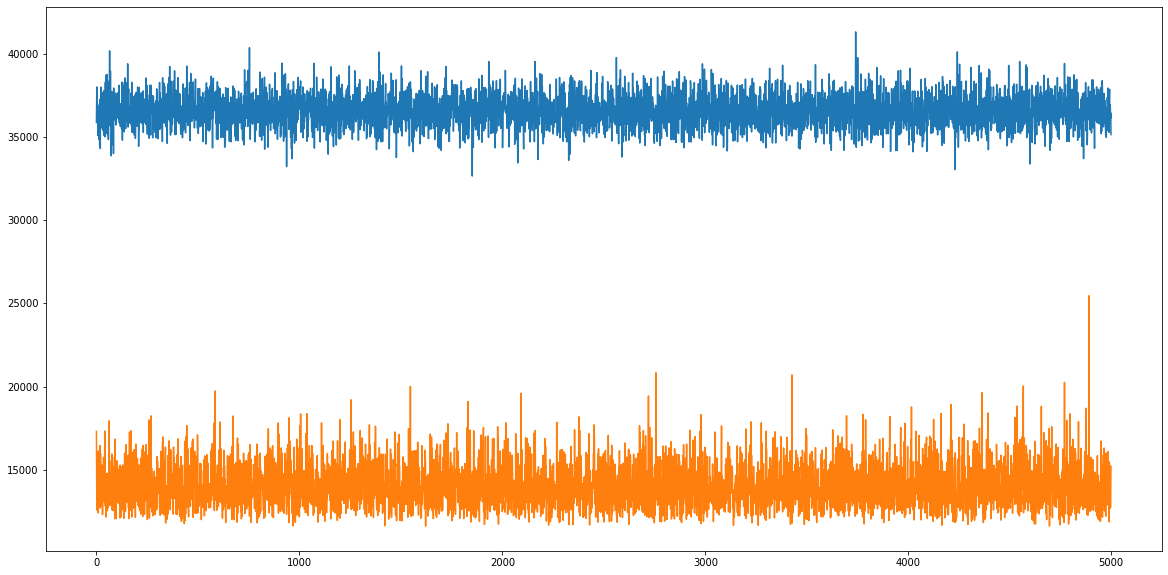

In [52]:
plt.plot(hist.loss)
plt.plot(hist.val_loss)
plt.show()

In [ ]:
model.save_weights('/content/drive/My Drive/stock-100000.h5')
hist

In [ ]:
X_train.iloc[0]

In [ ]:

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/sizes

In [58]:
from sklearn.impute import SimpleImputer